# Matthew Morgan Project Three Notebook 

For Project three I used a data set located at https://catalog.data.gov/dataset/3-year-recidivism-for-offenders-released-from-prison that indicates many variable for people such as sex and race and whether they were re-admitted to prison within 3 years of having been released. 
   
   I took a sample of a little over 100 people from the data set and created a simplified data set. I coded their sex as either 1 (male), or 0 (female); their race as either 1 (white non-hispanic), 2 (white hispanic), 3 (black non-hispanic), 4 (black hispanic), or 5 (american indian non-hispanic); and there recidivism as either 1 (re-admittded) or 0 (not readmitted).
   
   I then used this data set for the fllowing program to see if there is any relationship between sex and race on recidivism. The model di

In [194]:
import os
try:
    inputFunc = raw_input
except NameError:
    inputFunc = input

import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np
 
import seaborn as sns
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import random





def evaluate(pred, labels_test):
    acc = accuracy_score(pred, labels_test)
    print ("Accuracey: %s"%acc)
    tn, fp, fn, tp = confusion_matrix(labels_test, pred).ravel()

    recall = tp / (tp + fp)
    percision = tp / (tp + fn)
    f1 = (2 / ((1/recall)+(1/percision)))

    print ("")
    print ("True Negatives: %s"%tn)
    print ("False Positives: %s"%fp)
    print ("False Negatives: %s"%fn)
    print ("True Positives: %s"%tp)
    print ("Recall: %s"%recall)
    print ("Precision: %s"%percision)
    print ("F1 Score: %s"%f1)

def plot_bound(Z_val,data,col1,col2,binary):

    
    x_min = float(data.iloc[:,[col1]].min())-float(data.iloc[:,[col1]].min())*0.10 
    x_max = float(data.iloc[:,[col1]].max()+float(data.iloc[:,[col1]].min())*0.10)
    y_min = 0.0; 
    y_max = float(training.iloc[:,[col2]].max())+float(training.iloc[:,[col2]].max())*0.10
    h_x = (x_max-x_min)/100  
    h_y = (y_max-y_min)/100  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
    if binary == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   
        Z = np.where(Z=="Y",1,0)
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.pcolormesh(xx, yy, Z)
    plt.show()

## Data 

In [195]:

raw_data_df = pd.read_csv('Jail2.csv', parse_dates=[0]) 
raw_data_df.head()

,Sex,Race,Recidivism
0,1,1,1
1,0,1,1
2,1,1,1
3,1,1,1
4,1,1,1


In [196]:

raw_data_df["recidivism_Y_N"] = "N"
raw_data_df.head()

,Sex,Race,Recidivism,recidivism_Y_N
0,1,1,1,N
1,0,1,1,N
2,1,1,1,N
3,1,1,1,N
4,1,1,1,N


In [197]:
 
raw_data_df.loc[raw_data_df['Recidivism'] == 1, 'recidivism_Y_N'] = "Y"

raw_data_df.head()

,Sex,Race,Recidivism,recidivism_Y_N
0,1,1,1,Y
1,0,1,1,Y
2,1,1,1,Y
3,1,1,1,Y
4,1,1,1,Y


In [198]:
Rec_lin_df = raw_data_df[[
                               'Sex', 
                               'Race', 
                               'Recidivism'
                               ]].copy()
Rec_lin_df.head()

,Sex,Race,Recidivism
0,1,1,1
1,0,1,1
2,1,1,1
3,1,1,1
4,1,1,1


In [199]:
Rec_class_df = raw_data_df[[
                               'recidivism_Y_N', 
                               'Sex', 
                               'Race'
                               ]].copy()
Rec_class_df.head()

,recidivism_Y_N,Sex,Race
0,Y,1,1
1,Y,0,1
2,Y,1,1
3,Y,1,1
4,Y,1,1


## Taining and Validation


## Rec_lin_df



In [200]:
data = Rec_lin_df

data = data[data["Recidivism"]<1]

holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

AttributeError: 'str' object has no attribute 'conjugate'

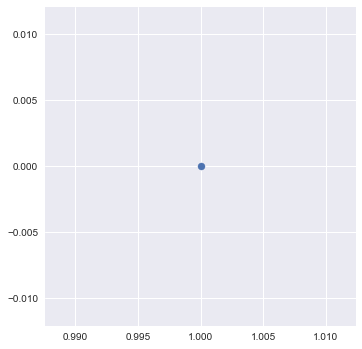

In [201]:
sns.lmplot(x="Sex", y="Recidivism", data=training, x_estimator=np.mean, order=1)

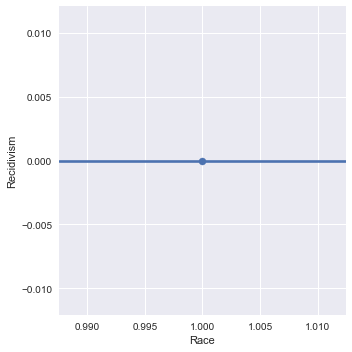

In [202]:
sns.lmplot(x="Race", y="Recidivism", data=training, x_estimator=np.mean, order=1)

In [206]:
model = ols("Recidivism ~ Race + Sex + np.power(Race, 2) + np.power(Sex, 2)", training).fit()
model.summary()

PatsyError: Error evaluating factor: TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'
    Recidivism ~ Race + Sex + np.power(Race, 2) + np.power(Sex, 2)
                                                  ^^^^^^^^^^^^^^^^

In [207]:
# Rerun with SciKitLearn because it's easy to check accuracy
features_train = training.drop("Recidivism", axis=1).as_matrix(columns=None)
labels_train = training["Recidivism"].as_matrix(columns=None)

features_test = holdout.drop("Recidivism", axis=1).as_matrix(columns=None)
labels_test = holdout["Recidivism"].as_matrix(columns=None)

lm = linear_model.LinearRegression()
clf = lm.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = metrics.r2_score(labels_test, pred)
print("R squared:",lm.score(features_train,labels_train))
print("Accuracy:",accuracy)

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

## Rec_class_df

Percentage of Ys: 0.9519230769230769



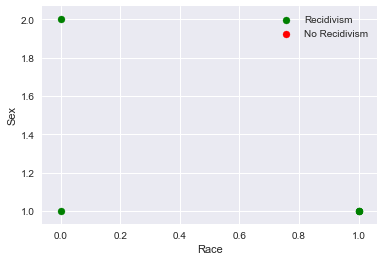

In [208]:
data = Rec_class_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

features_train = training.drop("recidivism_Y_N", axis=1).as_matrix(columns=None)
labels_train = training["recidivism_Y_N"].as_matrix(columns=None)

features_test = holdout.drop("recidivism_Y_N", axis=1).as_matrix(columns=None)
labels_test = holdout["recidivism_Y_N"].as_matrix(columns=None)

print("Percentage of Ys: %s\n"%(len(data[data["recidivism_Y_N"]=="Y"])/len(data)))

feature_1_no = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_2_no = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_1_yes = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
feature_2_yes = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
plt.scatter(feature_1_yes, feature_2_yes, color = "g", label="Recidivism")
plt.scatter(feature_1_no, feature_2_no, color = "r", label="No Recidivism")
plt.legend()
plt.xlabel("Race")
plt.ylabel("Sex")
plt.show()


In [209]:
# Logistic Regression
model = LogisticRegression(fit_intercept = False, C = 1e9)
clf = model.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Logistic Regression")
evaluate(pred, labels_test)  
plot_bound("Y",holdout,1,2,0)


# Test some spot
x_test = 70
y_test = 160000
print("")
print(clf.predict([[x_test,y_test]])[0])
print(clf.predict_proba([[x_test,y_test]])[0][1])
print("")

from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("\nDecision Tree")
evaluate(pred, labels_test)
plot_bound("Y",holdout,1,2,0)



from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Random Forest")
evaluate(pred, labels_test)  
plot_bound("Y",holdout,1,2,0)


from sklearn.svm import SVC
clf = SVC(kernel="rbf",probability=True)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("SVM")
evaluate(pred, labels_test)  
#plot_bound("Y",holdout,1,2,0) # plot doesn't work with SVM

Logistic Regression
Accuracey: 1.0


ValueError: not enough values to unpack (expected 4, got 1)